## High pr percentile and ROME - all models + obs

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import seaborn as sns

from os.path import expanduser
home = expanduser("~")

In [3]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]


obs = {'GPCP':True}


rome_options = [
    'rome',
    # 'rome_n'
    ]
rome_option = rome_options[0]


percentile_options = [
    # 'pr95',
    # 'pr97',
    'pr99',
    # 'pr999',
    ]
percentile_option = percentile_options[0]

## Climatology

### time mean

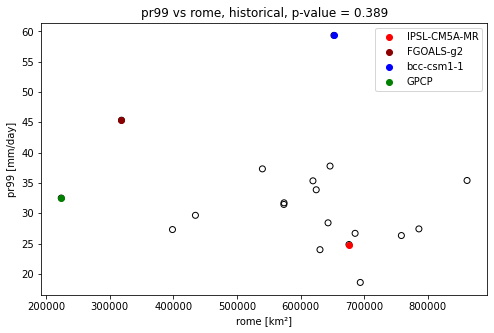

In [4]:
y= []
x= []
for model in models:

    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x = np.append(x, ds[rome_option].mean(dim='time'))

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y = np.append(y, ds[percentile_option].mean(dim='time'))


res= stats.pearsonr(x,y)


if obs['GPCP']:
    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rome.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x = np.append(x, ds[rome_option].mean(dim='time'))

    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_pr_percentiles.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y = np.append(y, ds[percentile_option].mean(dim='time'))



fig = plt.figure(figsize=(8,5))
plt.scatter(x,y,facecolors='none', edgecolor='k')



x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1'), -1]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1', 'GPCP']
colors = ['r','darkred','b', 'g']
j=0
for i in x_leg:
    plt.scatter(x[i],y[i],c=colors[j], label=label[j])
    j+=1

plt.title(percentile_option  + ' vs ' + rome_option + ', ' + experiment + ', p-value = '+ str(round(res[1],3)),)
plt.xlabel(rome_option  + ' [km\u00b2]')
plt.ylabel(percentile_option + ' [mm/day]')
plt.legend()

# plt.text(3e5, 55,'p-value: '+ str(round(res[1],3)),fontsize=10)
#plt.text(3e5, 80,'R$^2$: '+ str(round(res[0]**2,3)),fontsize=10)

### annual

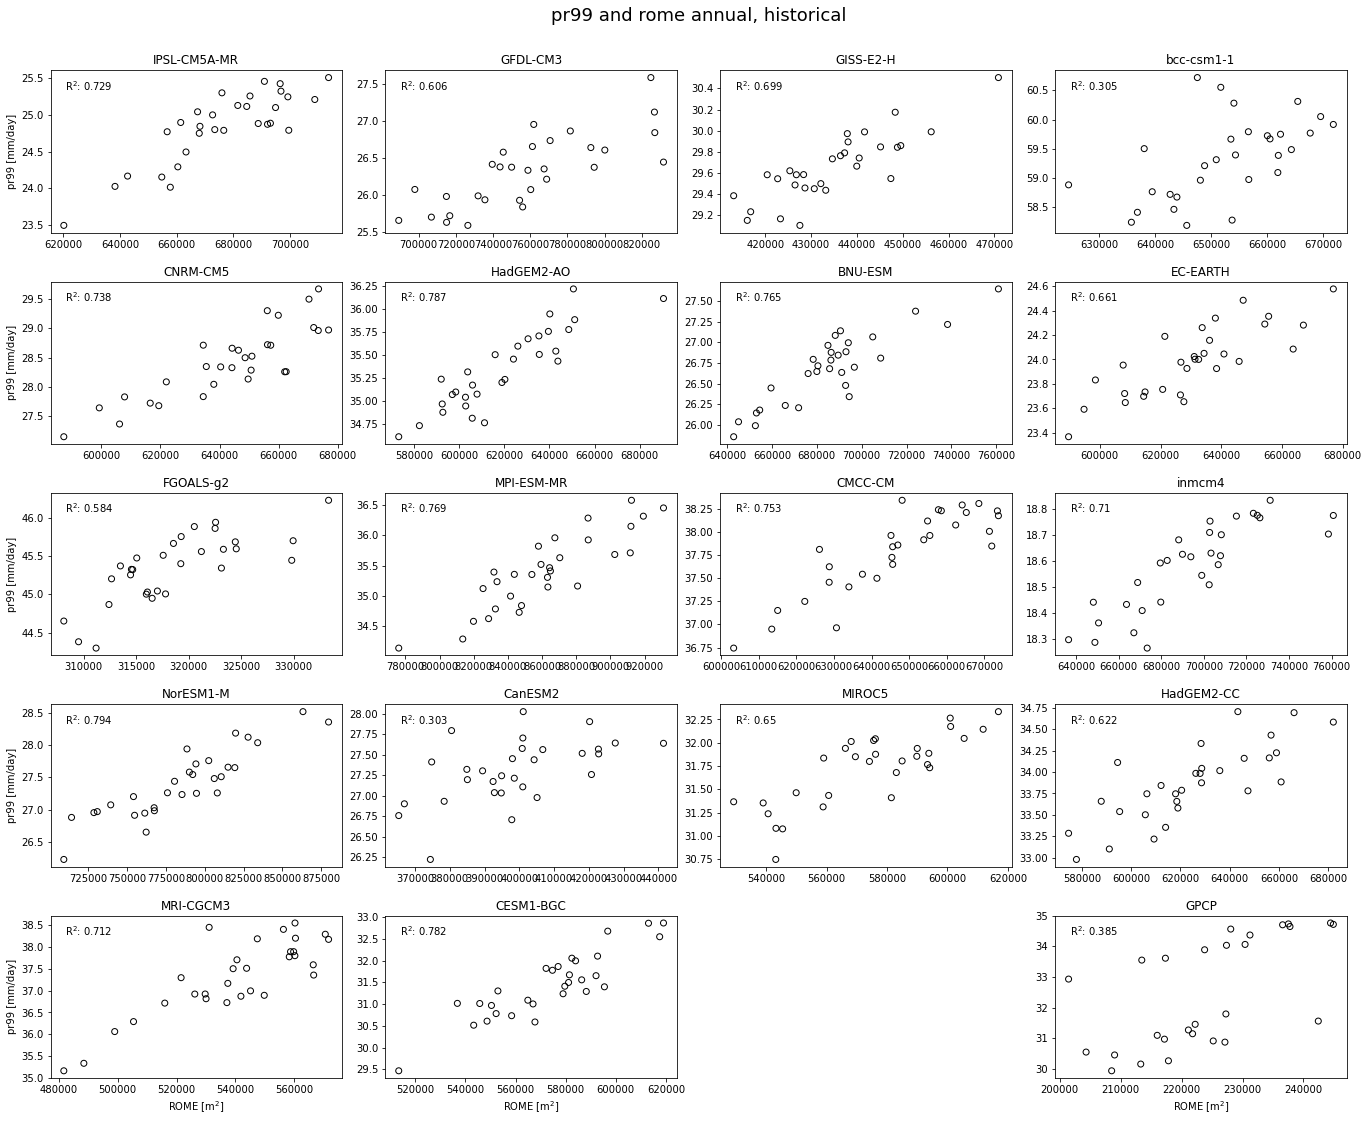

In [5]:
fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle(percentile_option + ' and ' + rome_option  + ' annual, ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):

    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x = ds[rome_option].resample(time='Y').mean(dim='time')

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y = ds[percentile_option].resample(time='Y').mean(dim='time')

    res= stats.pearsonr(x,y)


    ax= fig.add_subplot(5,4,i+1)
    plt.scatter(x,y,facecolors='none', edgecolor='k')
    plt.title(model)

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel(percentile_option + ' [mm/day]')

    if i>=16:
        plt.xlabel('ROME [m$^2$]')


if obs['GPCP']:
    ax= fig.add_subplot(5,4,20)

    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rome.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x = ds[rome_option].resample(time='Y').mean(dim='time')


    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_pr_percentiles.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y = ds[percentile_option].resample(time='Y').mean(dim='time')

    res= stats.pearsonr(x,y)


    plt.scatter(x,y,facecolors='none', edgecolor='k')
    plt.title('GPCP')
    plt.xlabel('ROME [m$^2$]')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
#sns.despine(top=True, right=True, left=False, bottom=False)

### seasonally

In [ ]:
def to_monthly(da):
    year = da.time.dt.year
    month = da.time.dt.month

    # assign new coords
    da = da.assign_coords(year=("time", year.data), month=("time", month.data))

    # reshape the array to (..., "month", "year")
    return da.set_index(time=("year", "month")).unstack("time")

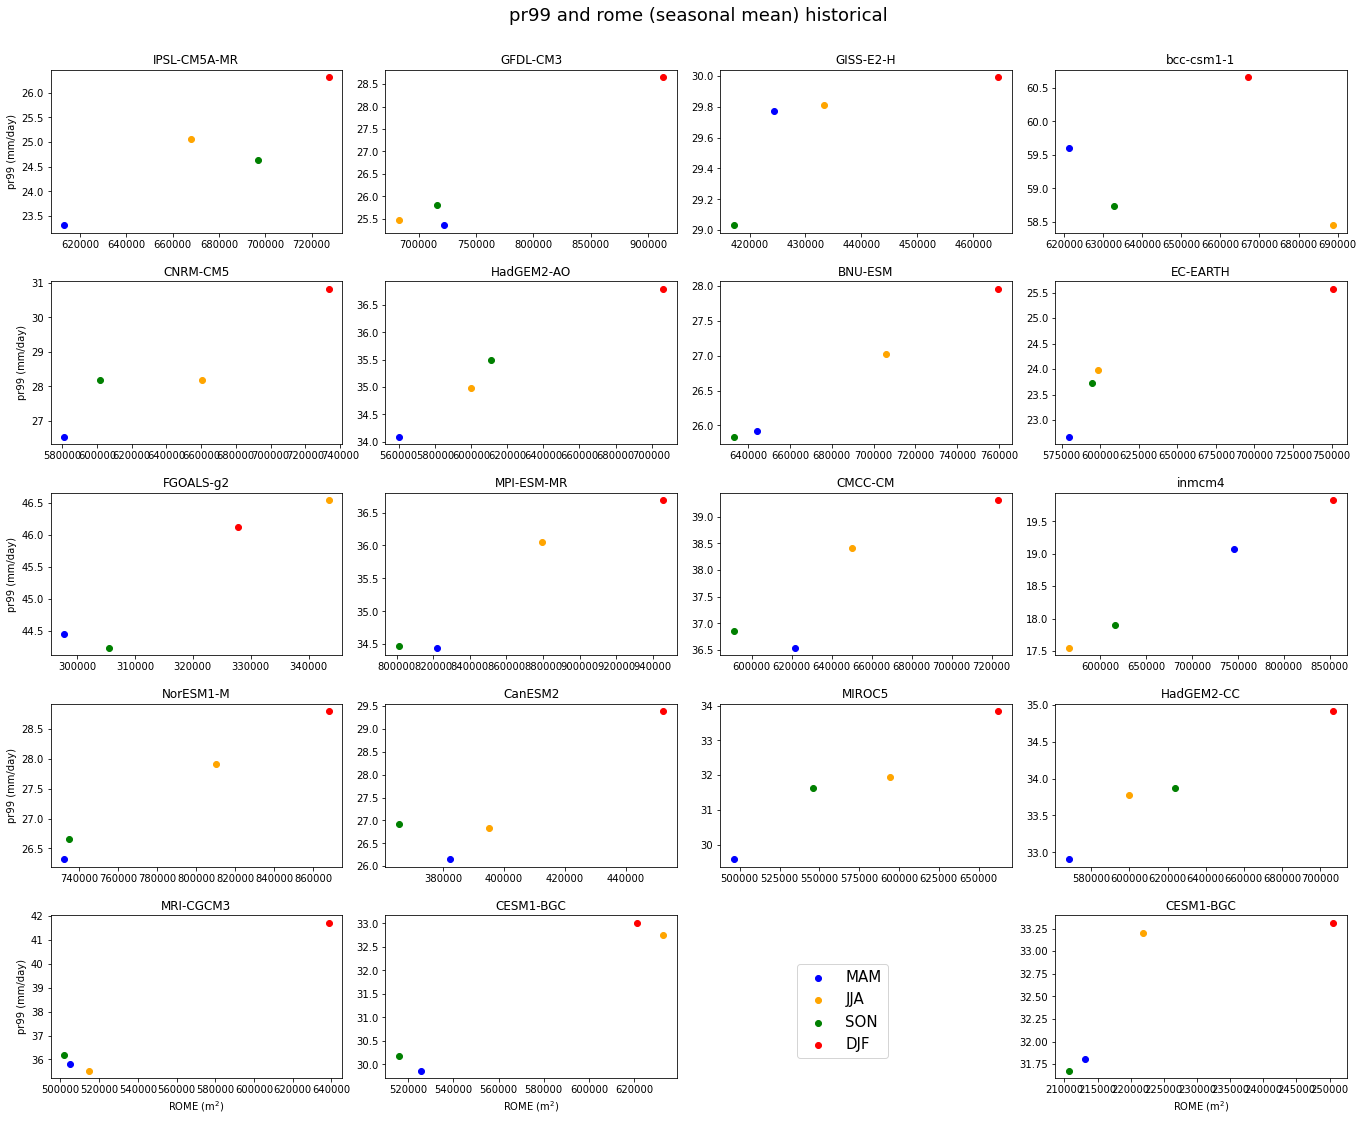

In [22]:
fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle(percentile_option + ' and ' + rome_option  + ' (seasonal mean) ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):

    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)


    rome_season = ds[rome_option].resample(time='QS-DEC').mean(dim="time")
    rome_season = to_monthly(rome_season)
    rome_season = rome_season.rename({'month':'season'})
    rome_season = rome_season.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])


    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)

    pr_season = ds[percentile_option].resample(time='QS-DEC').mean(dim="time")
    pr_season = to_monthly(pr_season)
    pr_season = pr_season.rename({'month':'season'})
    pr_season = pr_season.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])


    ax= fig.add_subplot(5,4,i+1)    
    ax.set_title(model)

    colors = ['blue', 'orange', 'green', 'red']
    for ii, season in enumerate(rome_season.season.values):
        xi = rome_season.mean(dim='year').sel(season=season)
        yi = pr_season.mean(dim='year').sel(season=season)
        ax.scatter(xi, yi, c=colors[ii], label=season)
    
    # plt.scatter(x,y,facecolors='none', edgecolor='k')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)


    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ax.set_ylabel(percentile_option + ' (mm/day)')

    if i>=16:
        ax.set_xlabel('ROME (m$^2$)')


if obs['GPCP']:
    ax= fig.add_subplot(5,4,20)

    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rome.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)


    rome_season = ds[rome_option].resample(time='QS-DEC').mean(dim="time")
    rome_season = to_monthly(rome_season)
    rome_season = rome_season.rename({'month':'season'})
    rome_season = rome_season.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])

    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_pr_percentiles.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)

    pr_season = ds[percentile_option].resample(time='QS-DEC').mean(dim="time")
    pr_season = to_monthly(pr_season)
    pr_season = pr_season.rename({'month':'season'})
    pr_season = pr_season.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])


    ax.set_title(model)
    ax.set_xlabel('ROME (m$^2$)')

    colors = ['blue', 'orange', 'green', 'red']
    for i, season in enumerate(rome_season.season.values):
        xi = rome_season.mean(dim='year').sel(season=season)
        yi = pr_season.mean(dim='year').sel(season=season)
        ax.scatter(xi, yi, c=colors[i], label=season)



plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
plt.legend(bbox_to_anchor=(-0.55, 0.75), fontsize = 15)
#sns.despine(top=True, right=True, left=False, bottom=False)

### monthly

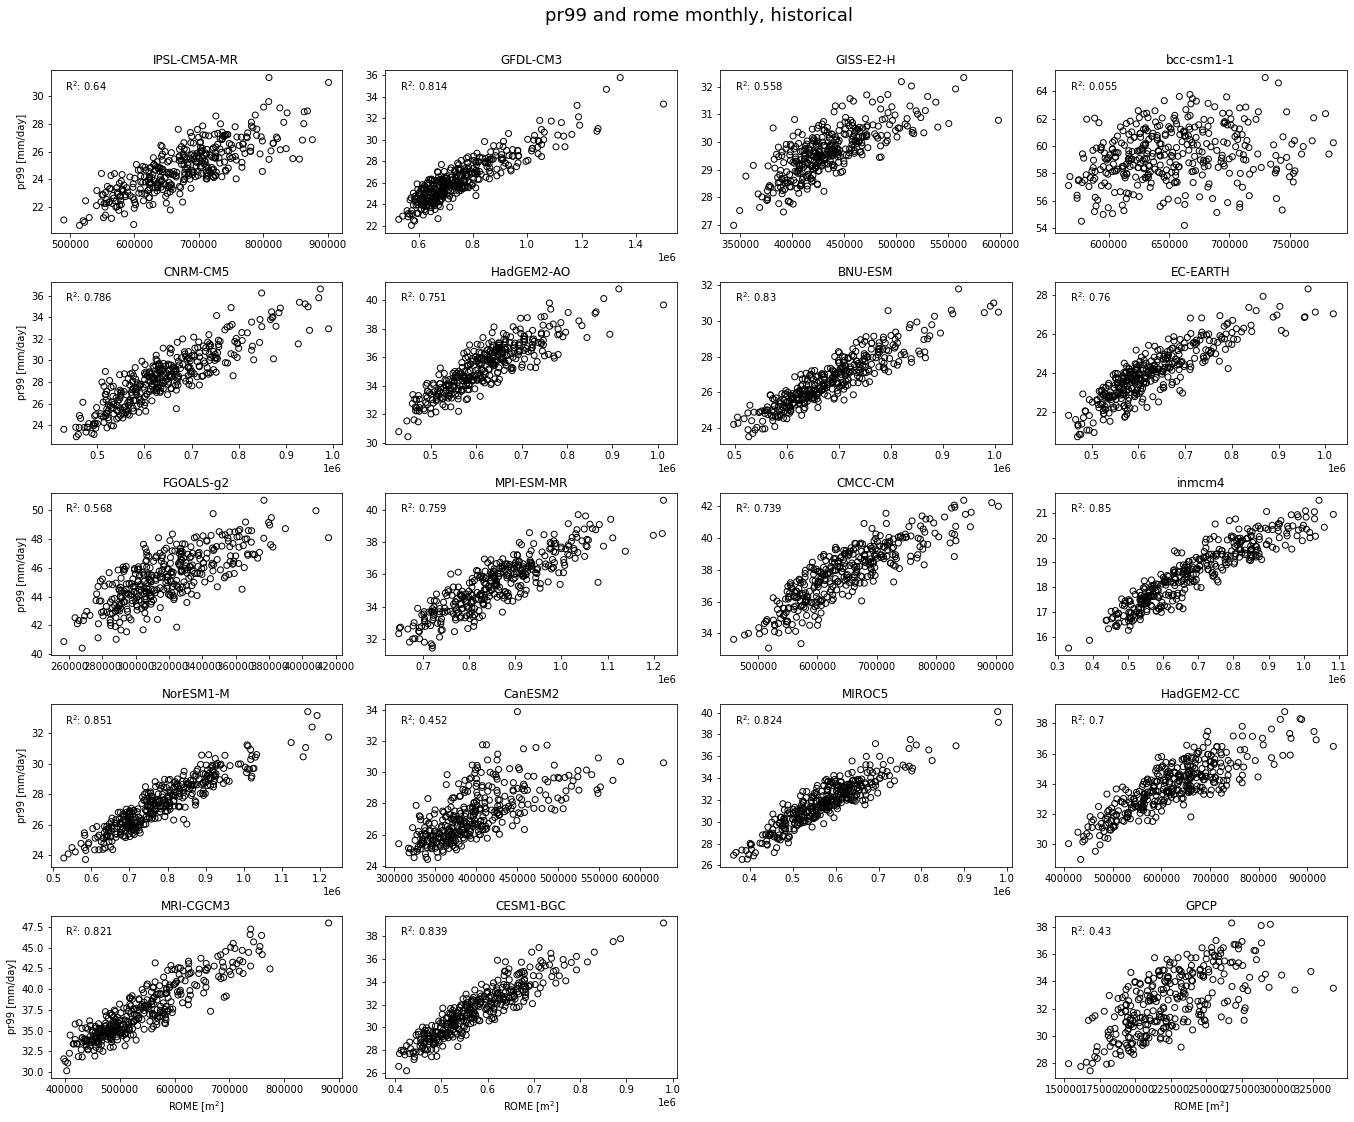

In [6]:
fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle(percentile_option + ' and ' + rome_option  + ' monthly, ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):

    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x = ds[rome_option].resample(time='M').mean(dim='time')

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y = ds[percentile_option].resample(time='M').mean(dim='time')

    res= stats.pearsonr(x,y)


    ax= fig.add_subplot(5,4,i+1)
    plt.scatter(x,y,facecolors='none', edgecolor='k')
    plt.title(model)

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel(percentile_option + ' [mm/day]')

    if i>=16:
        plt.xlabel('ROME [m$^2$]')


if obs['GPCP']:
    ax= fig.add_subplot(5,4,20)

    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rome.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x = ds[rome_option].resample(time='M').mean(dim='time')


    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_pr_percentiles.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y = ds[percentile_option].resample(time='M').mean(dim='time')

    res= stats.pearsonr(x,y)


    plt.scatter(x,y,facecolors='none', edgecolor='k')
    plt.title('GPCP')
    plt.xlabel('ROME [m$^2$]')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
#sns.despine(top=True, right=True, left=False, bottom=False)

### daily

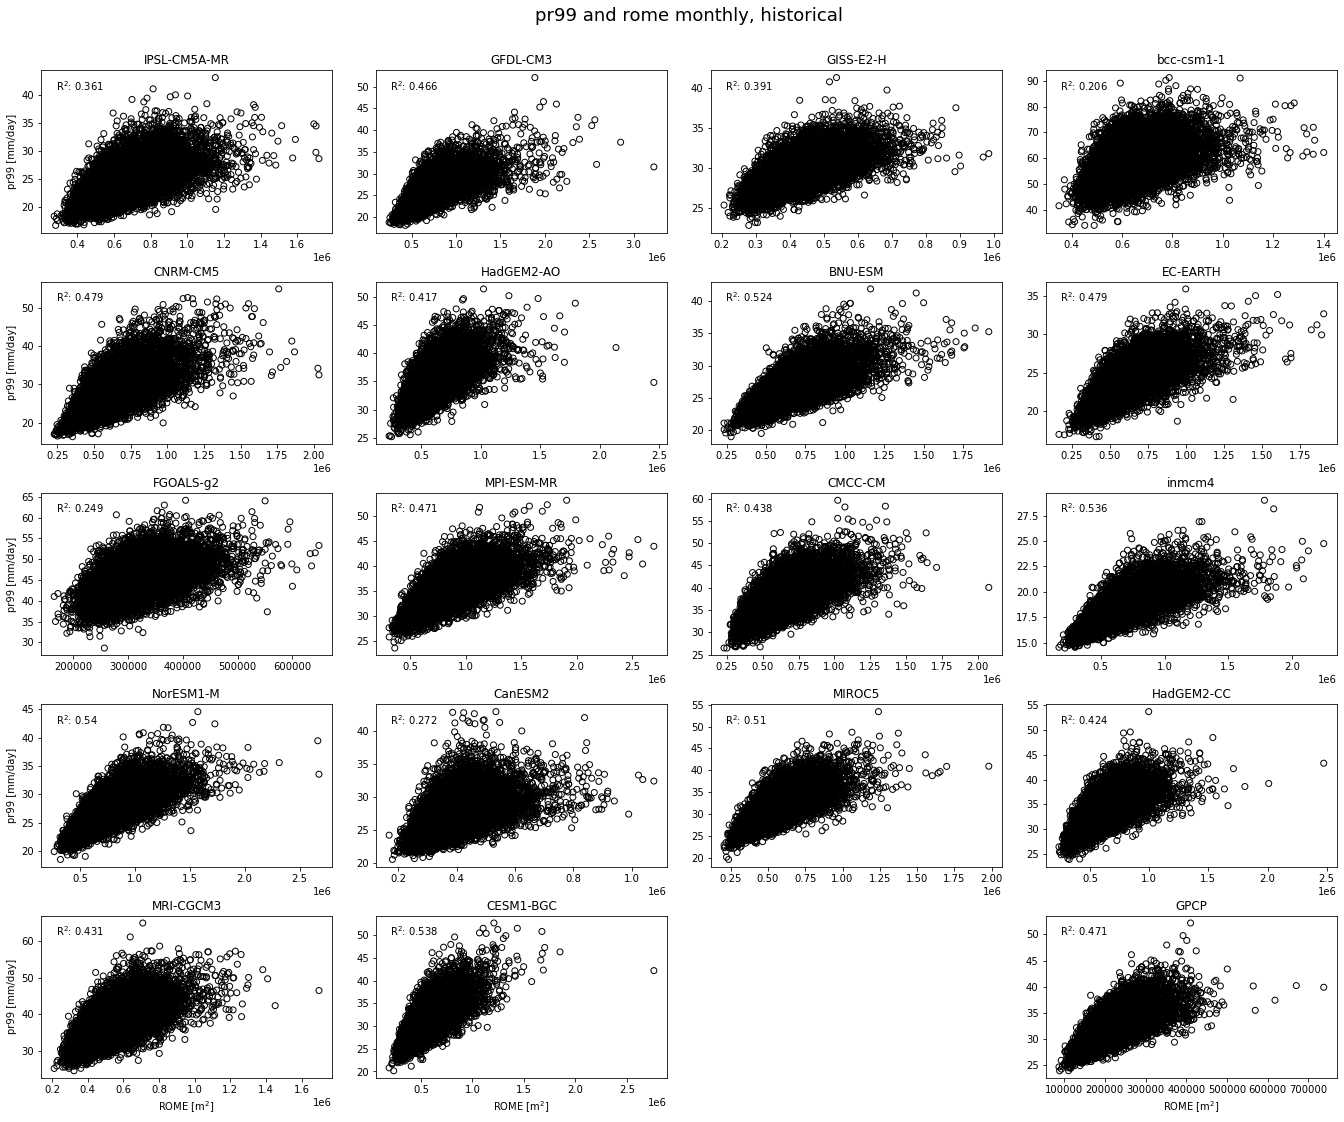

In [7]:
fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle(percentile_option + ' and ' + rome_option  + ' monthly, ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):

    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x = ds[rome_option]

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y = ds[percentile_option]

    res= stats.pearsonr(x,y)


    ax= fig.add_subplot(5,4,i+1)
    plt.scatter(x,y,facecolors='none', edgecolor='k')
    plt.title(model)

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel(percentile_option + ' [mm/day]')

    if i>=16:
        plt.xlabel('ROME [m$^2$]')


if obs['GPCP']:
    ax= fig.add_subplot(5,4,20)

    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rome.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x = ds[rome_option]


    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_pr_percentiles.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y = ds[percentile_option]

    res= stats.pearsonr(x,y)


    plt.scatter(x,y,facecolors='none', edgecolor='k')
    plt.title('GPCP')
    plt.xlabel('ROME [m$^2$]')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
#sns.despine(top=True, right=True, left=False, bottom=False)

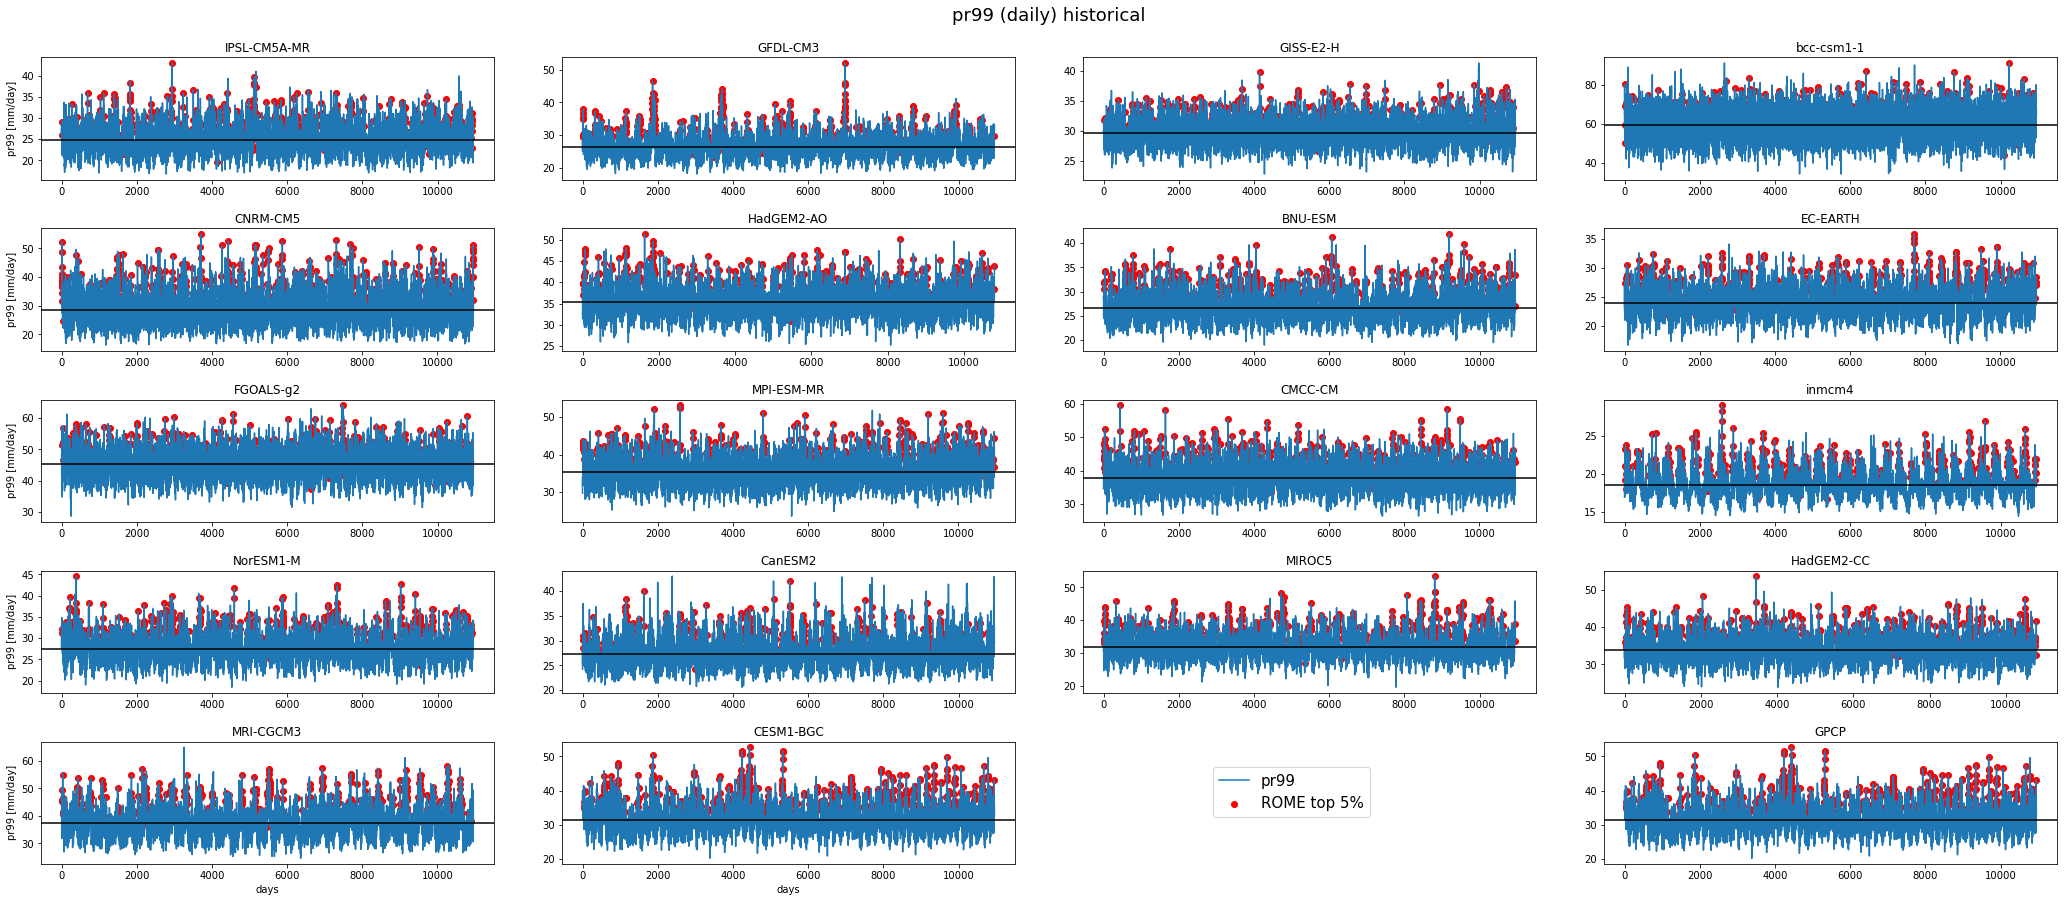

In [10]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (35,14))
f.suptitle(percentile_option + ' (daily) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):

    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    
    rome_prctile = np.percentile(ds[rome_option],95)
    x2= np.argwhere(ds[rome_option].data>=rome_prctile)


    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)

    y = ds[percentile_option].data
    x= np.arange(0,len(y),1)

    ax.plot(x,y, label=percentile_option)
    ax.scatter(x2,y[x2],label='ROME top 5%', color='r')
    ax.axhline(y=np.mean(y), color='k')
    ax.set_title(model)
    # ax.set_ylim(0,100)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('days')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel(percentile_option + ' [mm/day]')



if obs['GPCP']:
    ax = axes[-1,-1]
    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)

    rome_prctile = np.percentile(ds[rome_option],95)
    x2= np.argwhere(ds[rome_option].data>=rome_prctile)


    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)

    y = ds[percentile_option].data
    x= np.arange(0,len(y),1)

    ax.plot(x,y, label=percentile_option)
    ax.scatter(x2,y[x2],label='ROME top 5%', color='r')
    ax.axhline(y=np.mean(y), color='k')
    ax.set_title('GPCP')




plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
plt.legend(bbox_to_anchor=(-0.5, 0.85), fontsize= 15)

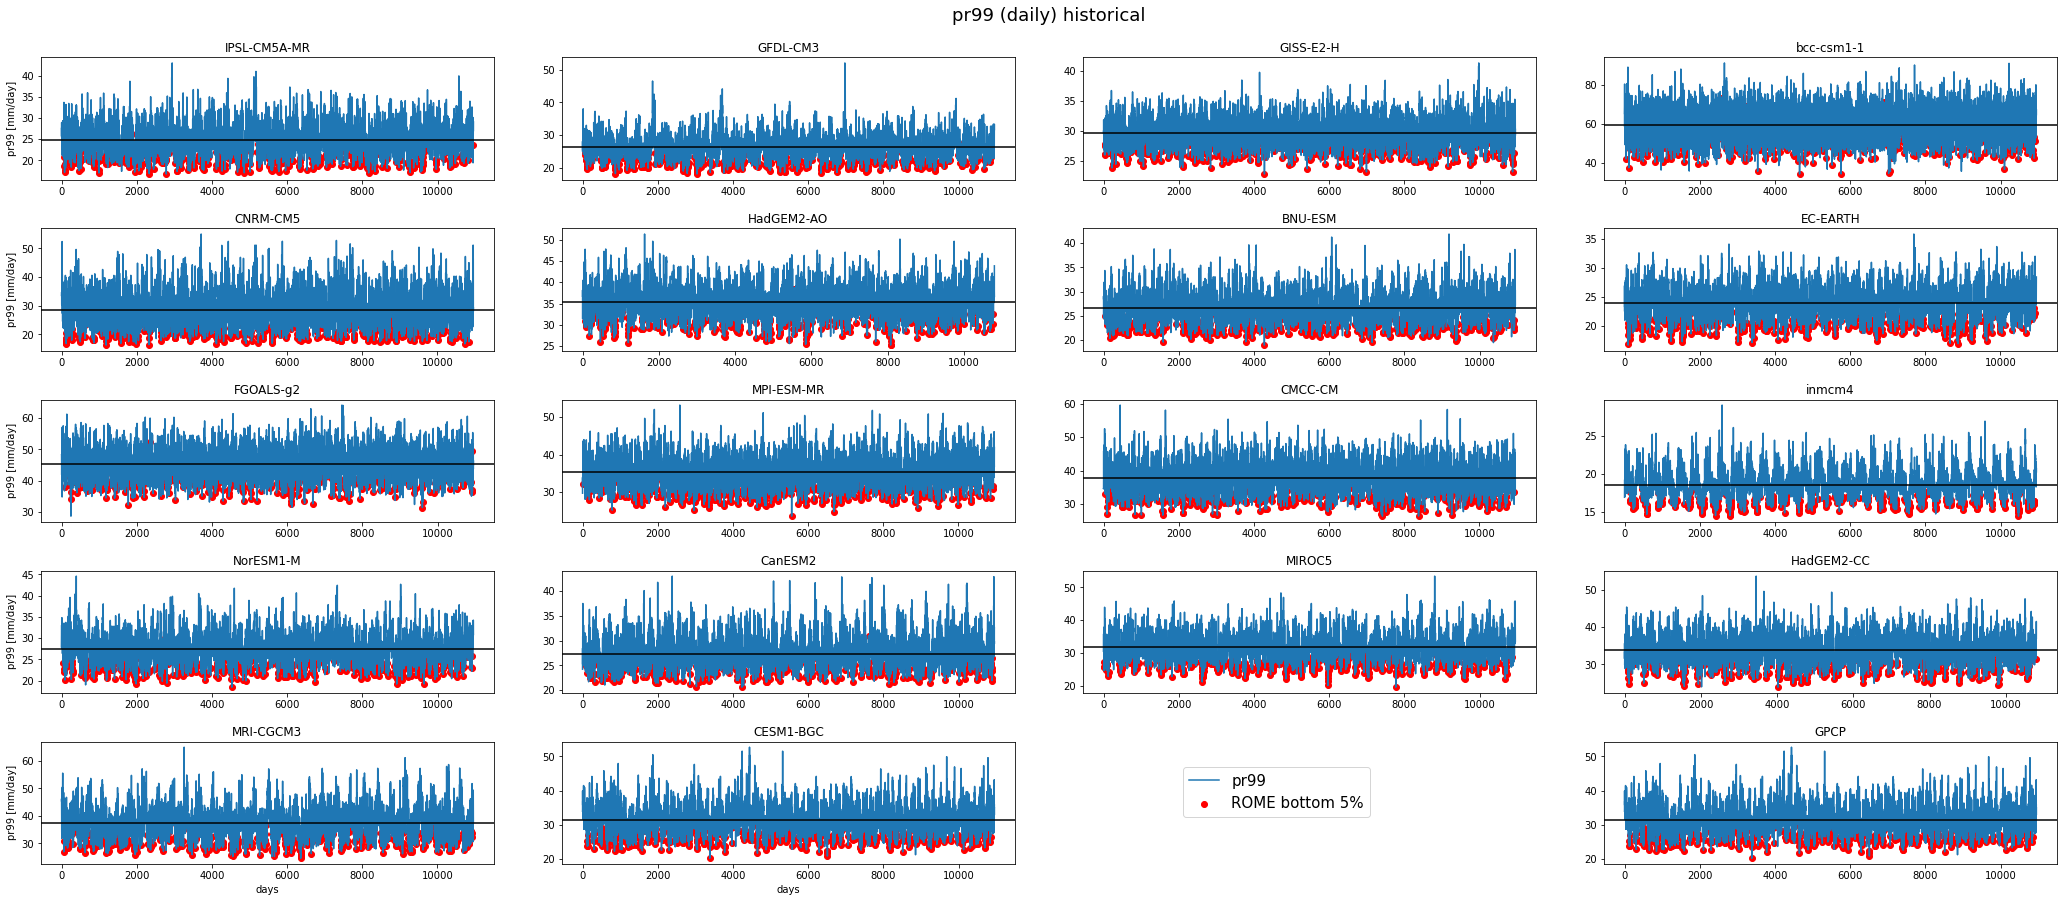

In [11]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (35,14))
f.suptitle(percentile_option + ' (daily) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):

    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    
    rome_prctile = np.percentile(ds[rome_option],5)
    x2= np.argwhere(ds[rome_option].data<=rome_prctile)


    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)

    y = ds[percentile_option].data
    x= np.arange(0,len(y),1)

    ax.plot(x,y, label=percentile_option)
    ax.scatter(x2,y[x2],label='ROME bottom 5%', color='r')
    ax.axhline(y=np.mean(y), color='k')
    ax.set_title(model)
    # ax.set_ylim(0,100)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('days')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel(percentile_option + ' [mm/day]')



if obs['GPCP']:
    ax = axes[-1,-1]
    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)

    rome_prctile = np.percentile(ds[rome_option],5)
    x2= np.argwhere(ds[rome_option].data<=rome_prctile)


    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)

    y = ds[percentile_option].data
    x= np.arange(0,len(y),1)

    ax.plot(x,y, label=percentile_option)
    ax.scatter(x2,y[x2],label='ROME bottom 5%', color='r')
    ax.axhline(y=np.mean(y), color='k')
    ax.set_title('GPCP')




plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
plt.legend(bbox_to_anchor=(-0.5, 0.85), fontsize= 15)

## Change with warming

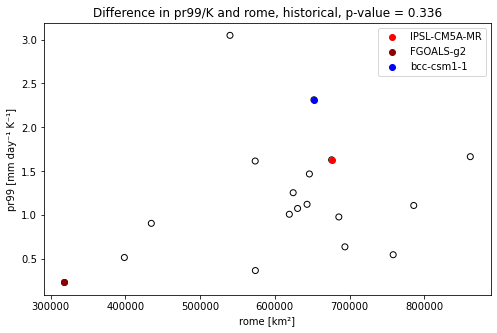

In [20]:
x, y_diff = [], []

for model in models:
    
    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_tas_sMean_historical.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    tas_historical = ds['tas_sMean'].mean(dim='time')

    fileName = model + '_tas_sMean_rcp85.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    tas_rcp = ds['tas_sMean'].mean(dim='time')

    tas_diff = tas_rcp - tas_historical


    fileName = model + '_rome_historical.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x_historical = ds[rome_option].mean(dim='time')


    fileName = model + '_rome_rcp85.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x_rcp = ds[rome_option].mean(dim='time')


    x = np.append(x,  x_historical)


    fileName = model + '_pr_percentiles_historical.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y_historical = ds[percentile_option].mean(dim='time')


    fileName = model + '_pr_percentiles_rcp85.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y_rcp = ds[percentile_option].mean(dim='time')


    y_diff  = np.append(y_diff, (y_rcp - y_historical)/tas_diff)



fig = plt.figure(figsize=(8,5))
plt.scatter(x,y_diff,facecolors='none', edgecolor='k')
res= stats.pearsonr(x,y_diff)
#plt.text(3e5, 80,'R$^2$: '+ str(round(res[0]**2,3)),fontsize=10)
# plt.text(3e5, 2.5,'p-value: '+ str(round(res[1],3)),fontsize=10)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x[i],y_diff[i],c=colors[j], label=label[j])
    j+=1

plt.title('Difference in ' + percentile_option  + '/K and ' + rome_option + ', ' + experiment + ', p-value = '+ str(round(res[1],3)))
plt.xlabel(rome_option  + ' [km\u00b2]')
plt.ylabel(percentile_option + ' [mm day' + chr(0x207B) + chr(0x00B9) + ' K' + chr(0x207B) + chr(0x00B9) + ']')
plt.legend()



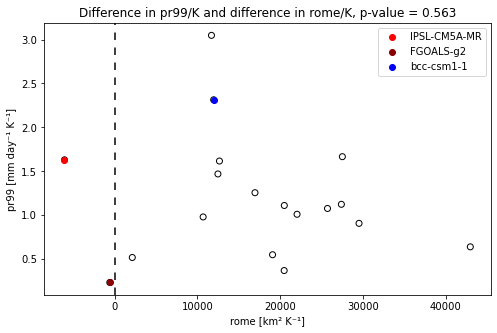

In [21]:
x_diff, y_diff = [], []

for model in models:

    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_tas_sMean_historical.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    tas_historical = ds['tas_sMean'].mean(dim='time')

    fileName = model + '_tas_sMean_rcp85.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    tas_rcp = ds['tas_sMean'].mean(dim='time')

    tas_diff = tas_rcp - tas_historical


    fileName = model + '_rome_historical.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x_historical = ds[rome_option].mean(dim='time')


    fileName = model + '_rome_rcp85.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x_rcp = ds[rome_option].mean(dim='time')


    x_diff = np.append(x_diff,  (x_rcp - x_historical) / tas_diff)


    fileName = model + '_pr_percentiles_historical.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y_historical = ds[percentile_option].mean(dim='time')


    fileName = model + '_pr_percentiles_rcp85.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y_rcp = ds[percentile_option].mean(dim='time')


    y_diff  = np.append(y_diff, (y_rcp - y_historical)/tas_diff)





fig = plt.figure(figsize=(8,5))
plt.scatter(x_diff,y_diff,facecolors='none', edgecolor='k')
res= stats.pearsonr(x_diff,y_diff)
#plt.text(3e5, 80,'R$^2$: '+ str(round(res[0]**2,3)),fontsize=10)
# plt.text(-8000, 2.5,'p-value: '+ str(round(res[1],3)),fontsize=10)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x_diff[i],y_diff[i],c=colors[j], label=label[j])
    j+=1

plt.title('Difference in ' + percentile_option  + '/K and difference in ' + rome_option + '/K, '+ 'p-value = '+ str(round(res[1],3)))
plt.axvline(0, color='k',linestyle= (0, (5, 5)))
plt.xlabel(rome_option  + ' [km\u00b2' + ' K' + chr(0x207B) + chr(0x00B9) + ']')
plt.ylabel(percentile_option + ' [mm day' + chr(0x207B) + chr(0x00B9) + ' K' + chr(0x207B) + chr(0x00B9) + ']')
plt.legend()



## other

### monthly mean

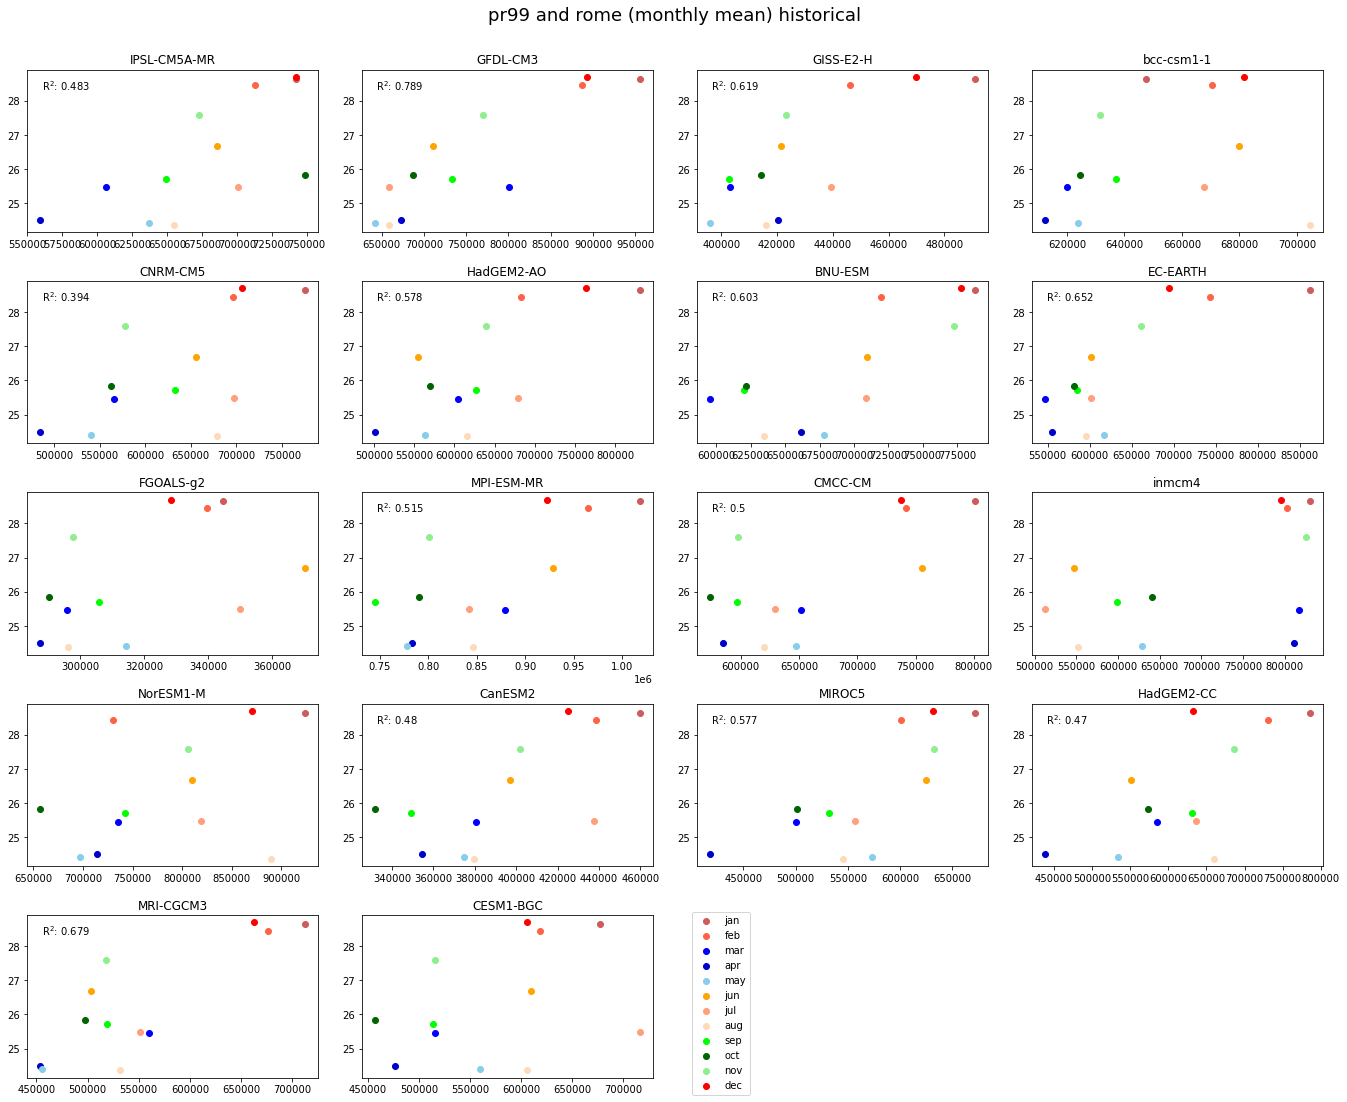

In [ ]:
fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle(percentile_option + ' and ' + rome_option  + ' (monthly mean) ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug', 'sep', 'oct', 'nov', 'dec'] 


    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    rome_monthly = to_monthly(rome[rome_option])
    rome_monthly = rome_monthly.assign_coords(month = months)


    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    pr_percentile = xr.open_dataset(path)
    pr_monthly = to_monthly(pr_percentiles[percentile_option])
    pr_monthly = pr_monthly.assign_coords(month = months)


    ax= fig.add_subplot(5,4,i+1)
    
    x = rome_monthly.mean(dim='year')
    y = pr_monthly.mean(dim='year')

    colors = ['#cd5c5c', '#ff6347', '#0000ff', '#0000cd', '#87ceeb', '#ffa500', '#ffa07a', '#ffdab9', '#00ff00', '#006400', '#90ee90', '#ff0000']
    for i, month in enumerate(rome_monthly.month.values):
        xi = rome_monthly.mean(dim='year').sel(month=month)
        yi = pr_monthly.mean(dim='year').sel(month=month)
        ax.scatter(xi, yi, c=colors[i], label=month)


    # plt.scatter(x,y,facecolors='none', edgecolor='k')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    res= stats.pearsonr(x,y)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')


    plt.title(model)
    
    

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel(percentile_option + ' (mm/day)')


    if i>=15:
        plt.xlabel('ROME (m$^2$)')

        


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
plt.legend(bbox_to_anchor=(1.35, 1.05))
#sns.despine(top=True, right=True, left=False, bottom=False)